<a href="https://colab.research.google.com/github/matheusjk/rag/blob/main/rag_multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Links Importantes

https://www.datacamp.com/pt/tutorial/llama-3-2-vision-rag


https://pydigger.com/pypi/Byaldi


https://www.geeksforgeeks.org/multimodal-retrieval-augmented-generation-multimodal-rag/

In [ ]:
!pip install byaldi
!sudo apt-get install -y poppler-utils
!pip install -q git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn optimum auto-gptq bitsandbytes transformers==4.48.0
# !pip install ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# !pip install --upgrade byaldi
# !pip install flash-attn

In [ ]:
# !pip install -q --upgrade accelerate einops xformers

In [ ]:
# !sudo apt-get install -y poppler-utils

In [ ]:
import os, base64
from byaldi import RAGMultiModalModel

rag = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=1)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [ ]:
!wget https://www.ime.usp.br/~mapweb/tcc/2018/WagnerJorcuvichV3.pdf

--2025-06-22 03:33:49--  https://www.ime.usp.br/~mapweb/tcc/2018/WagnerJorcuvichV3.pdf
Resolving www.ime.usp.br (www.ime.usp.br)... 200.144.244.77
Connecting to www.ime.usp.br (www.ime.usp.br)|200.144.244.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2589380 (2.5M) [application/pdf]
Saving to: ‘WagnerJorcuvichV3.pdf’

WagnerJorcuvichV3.p 100%[===================>]   2.47M  2.37MB/s    in 1.0s    

2025-06-22 03:33:52 (2.37 MB/s) - ‘WagnerJorcuvichV3.pdf’ saved [2589380/2589380]



In [ ]:
# https://arxiv.org/pdf/2506.08872

In [ ]:
rag.index(
    input_path="/content/WagnerJorcuvichV3.pdf",
    index_name="quantum_computer",
    store_collection_with_index=True, # store base64 represetation of images
    overwrite=True
)

Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to index.
Added page 25 of document 0 to index.
Added page 26 of document 0 to index.
Added page 27 of docu

{0: '/content/WagnerJorcuvichV3.pdf'}

In [ ]:
query = "Algoritmos de Shor onde são aplicados?"
resultados = rag.search(query, k=1)
resultados

[{'doc_id': 0, 'page_num': 54, 'score': 14.875, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAABnYAAAkjCAIAAACzq+aSAAEAAElEQVR4nOzdd3wUZeLH8We2ZFs22fRKICGB0FGwYAdsgI1TUfQsqNj7nYqingUrKt7ZFUGwIdgVUWmKNOk1tARCes+mb5/fH3PuL5dGkgkJCZ/3H7zC1GdmJ5uZ7zxFkmVZAAAAAAAAAGgvTVcXAAAAAAAAAOjeiNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAAABViNgAAAAAAAAAVYjYAAAAAAAAAFWI2AAAAAAAA

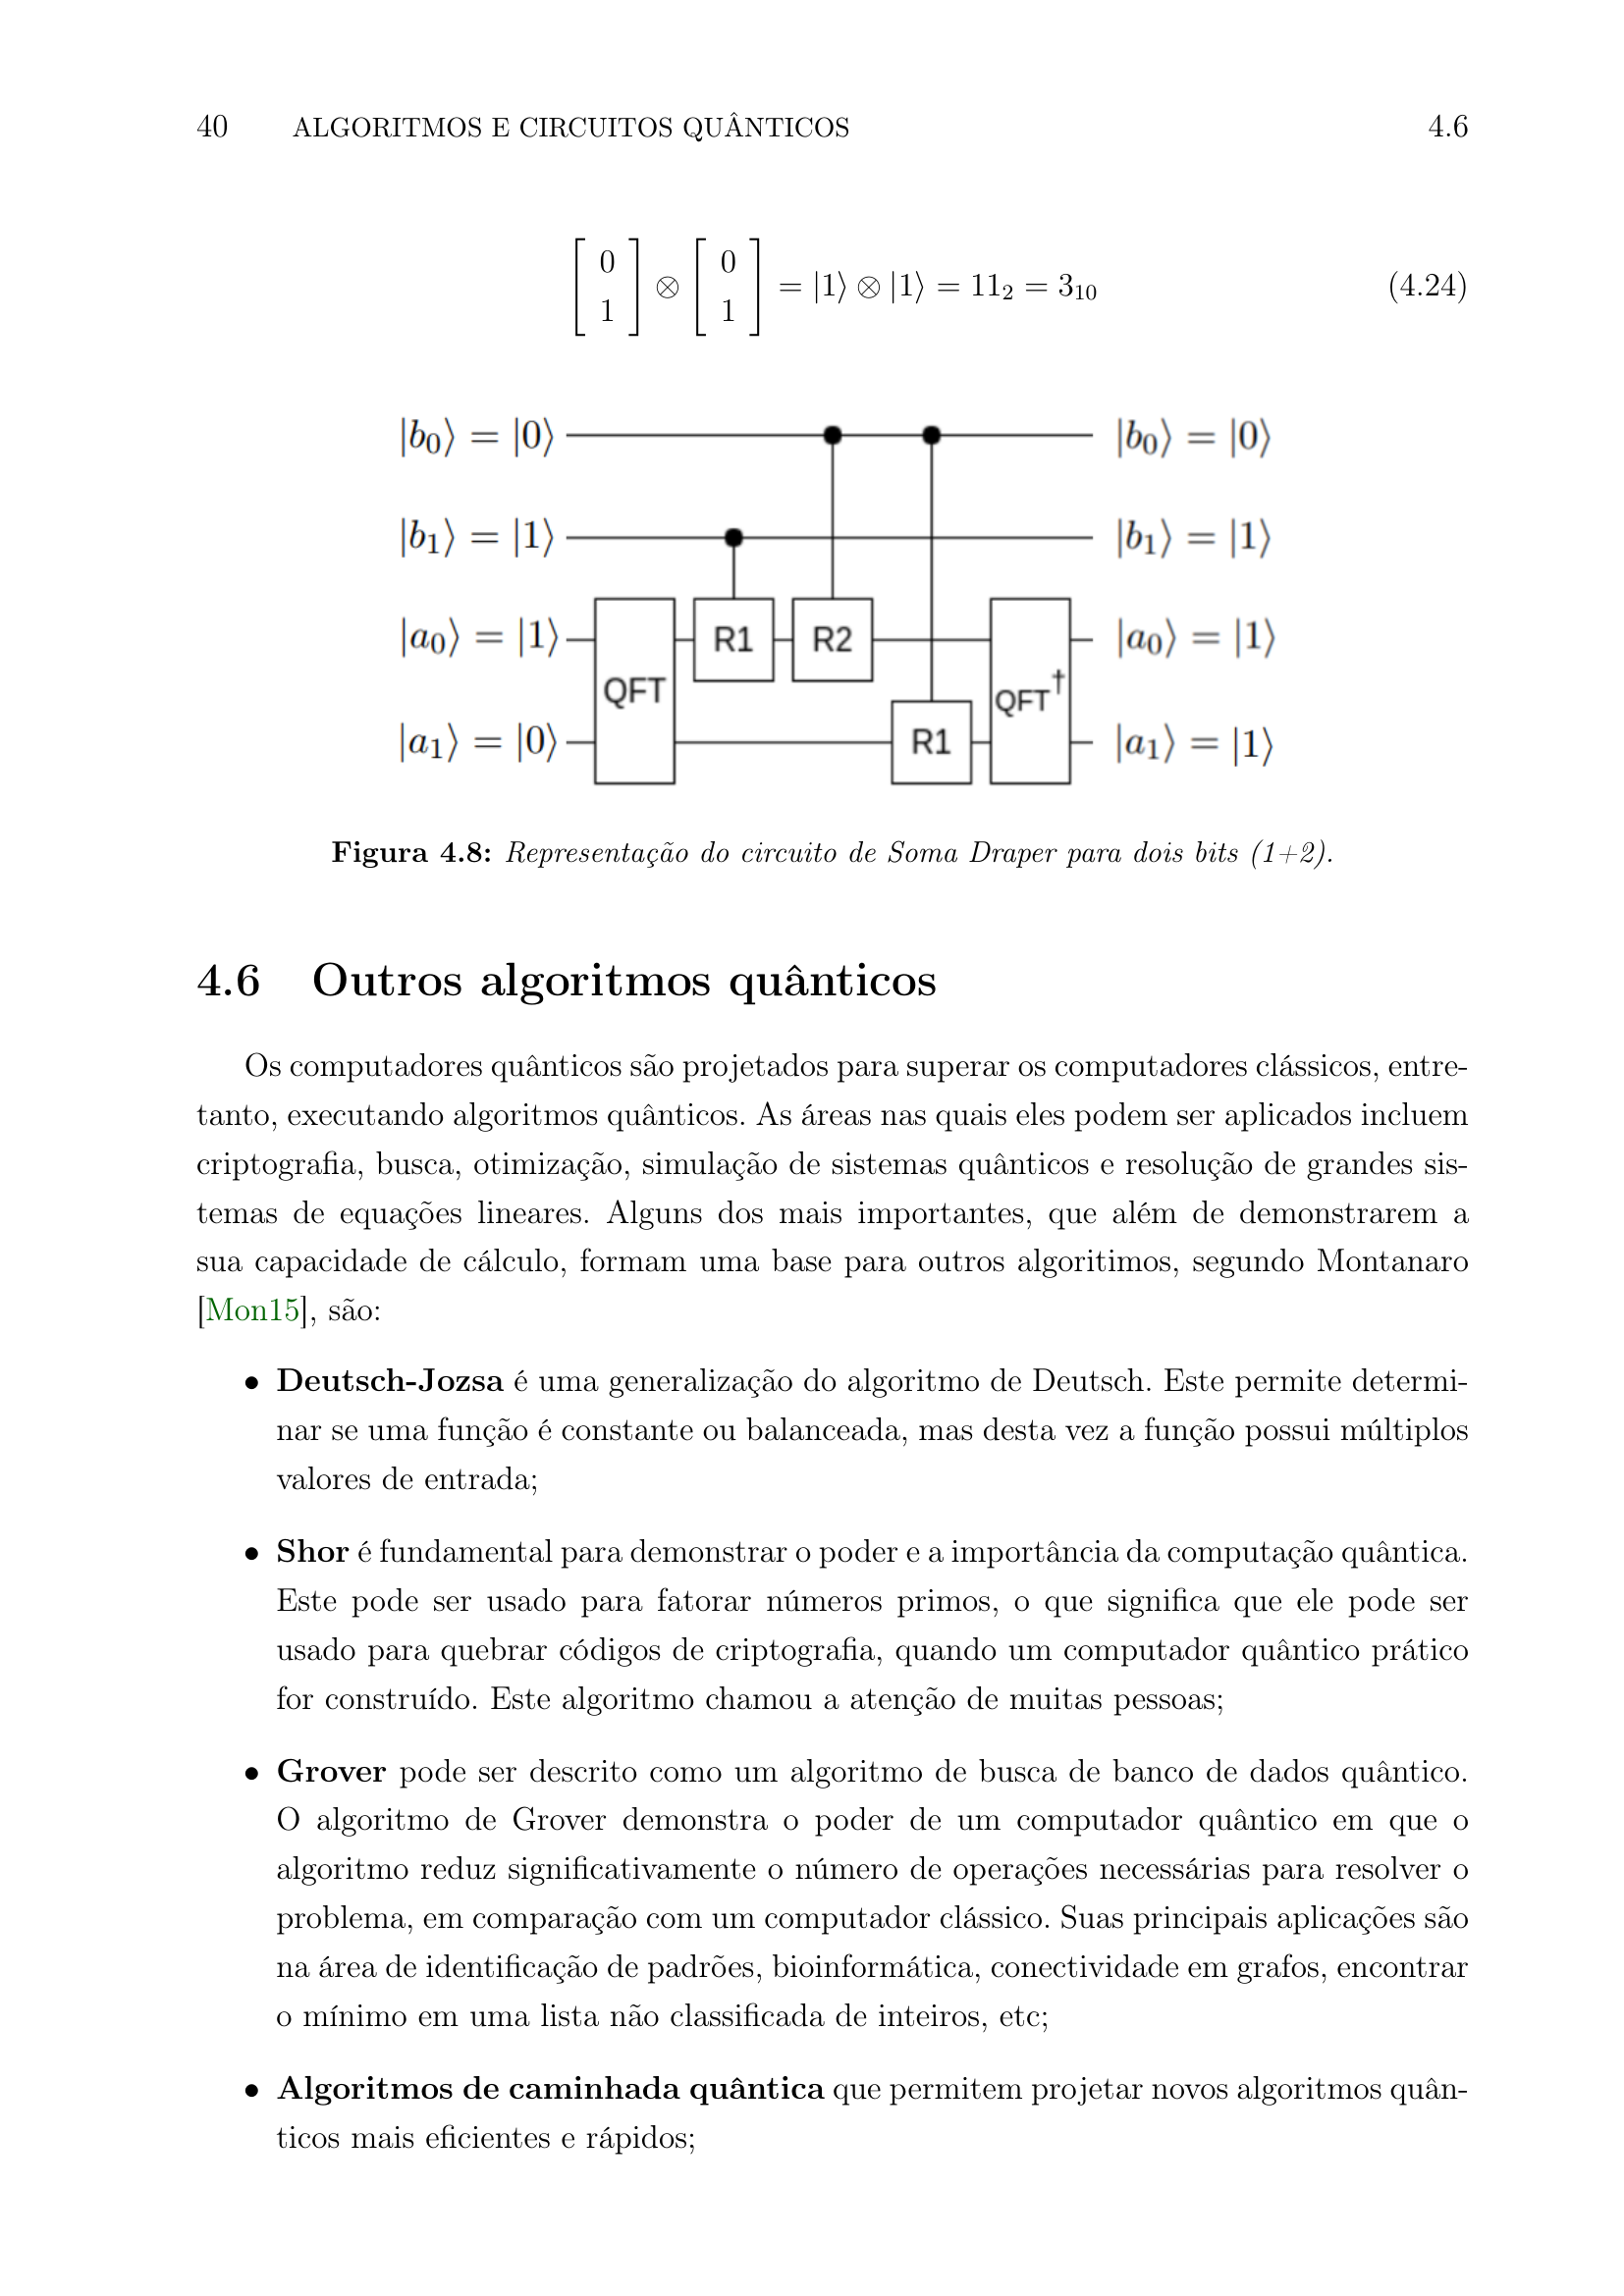

In [ ]:
from IPython.display import Image


def veja_image(image_base64):
  image_bytes = base64.b64decode(image_base64)
  filename = '/tmp/image.jpg'
  with open(filename, 'wb') as f:
    f.write(image_bytes)
  display(Image(filename))


for res in resultados:
  veja_image(res['base64'])

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!pip install colab-xterm
%load_ext colabxterm

The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


In [ ]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!ollama list

Error: ollama server not responding - could not connect to ollama server, run 'ollama serve' to start it


In [ ]:
!ollama run gemma3:4b


>>> Send a message (/? for help)^C


In [ ]:
# import ollama

# response = ollama.chat(
#     model='llama3.2-vision',
#     messages=[{
#         'role': 'user',
#         'content': "Quais e quantos são os algoritmos quanticos?",
#         'images': ['/tmp/image.jpg']
#     }]
# )
# print(response['message']['content'])

In [ ]:
import ollama

response = ollama.chat(
    model='gemma3:4b',
    messages=[{
        'role': 'user',
        'content': "Quais e quantos são os algoritmos quanticos?",
        'images': ['/tmp/image.jpg']
    }]
)
print(response['message']['content'])

De acordo com a imagem fornecida, os algoritmos quanticos incluem:

*   **Deutsch-Jozsa:** É uma generalização do algoritmo de Deutsch.
*   **Grover:** Demonstra o poder de um computador quântico.
*   **Algoritmos de caminhada quantica:** Permitem projetar novos algoritmos quanticos.

Não é especificado o número exato de algoritmos, apenas que existem algoritmos "mais eficientes e rápidos".


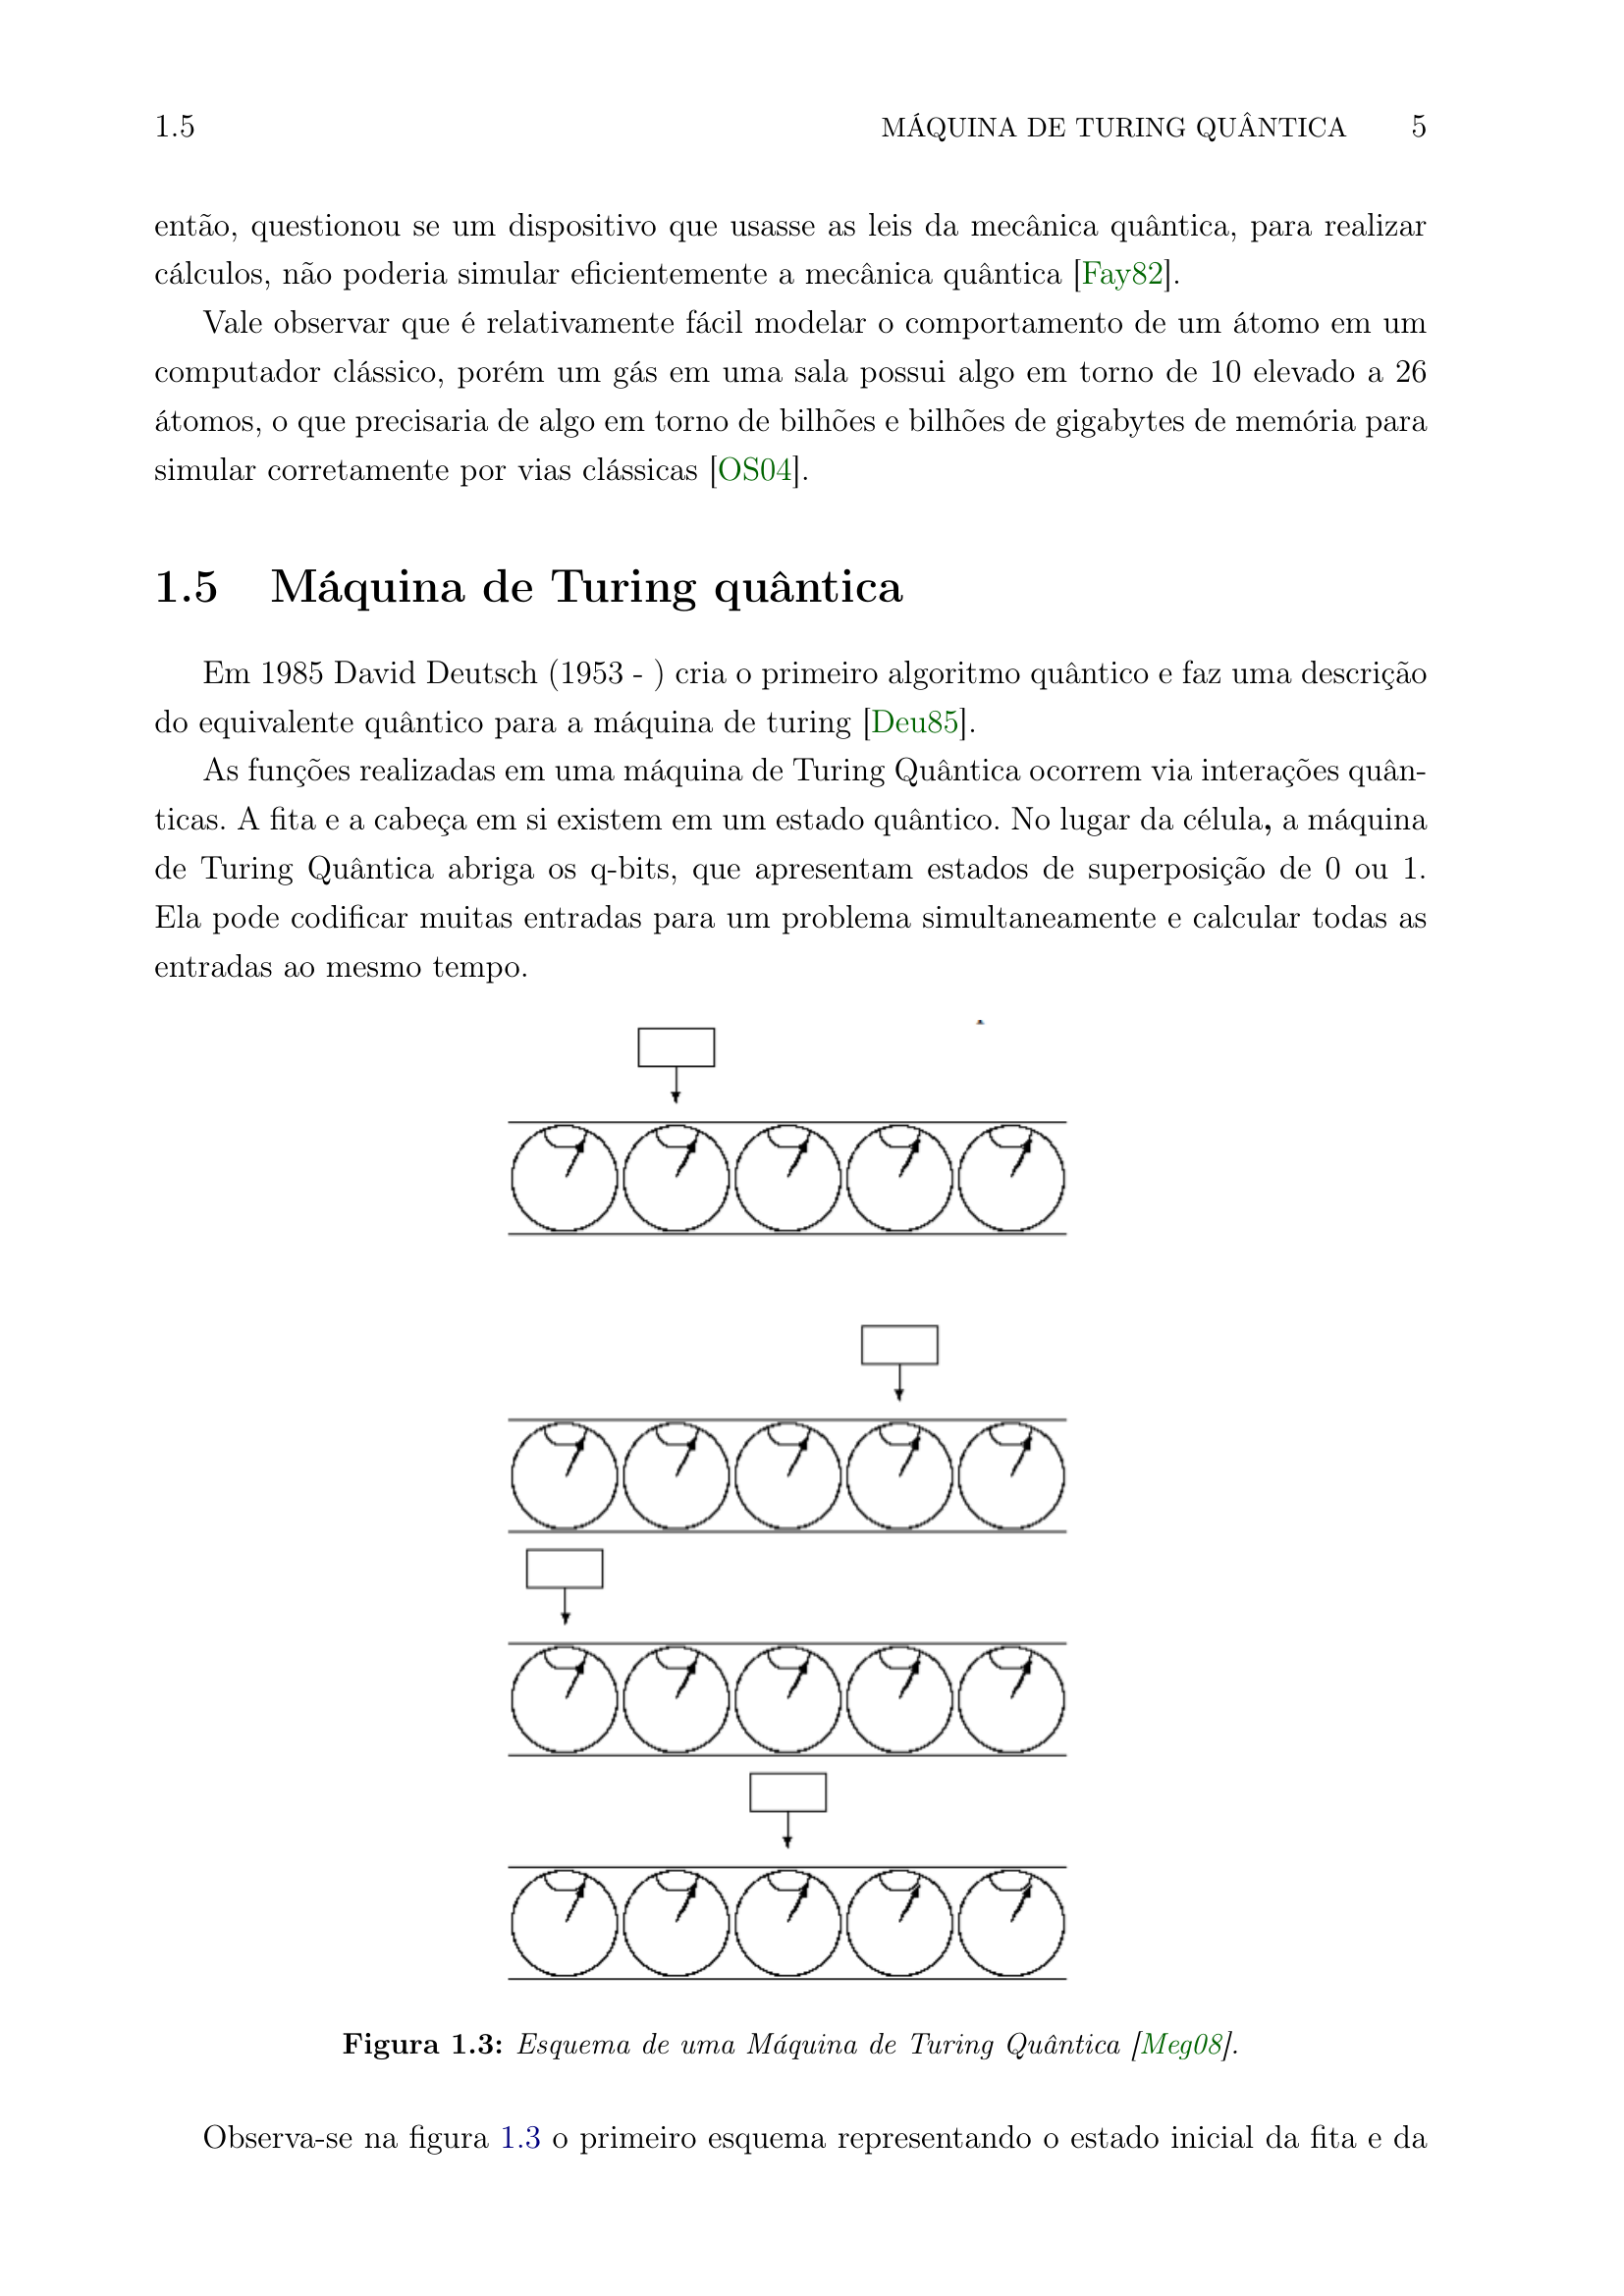

A figura 1 representa o esquema do primeiro esboço da Máquina Quântica de Turing de David Deutsch (1955). Vamos detalhar o que ela mostra:

**Elementos principais:**

*   **Célula (O):** Este é o núcleo da máquina. Representa o estado quântico, onde a superposição de estados (0 e 1) é fundamental. É onde a informação é armazenada e processada quânticamente.
*   **Cabeça de Leitura/Escrita (□):** Esta parte é responsável por ler o estado da célula e, em seguida, escrever um novo estado. Ela se move através das células.
*   **Células (□):** As células individuais representam estados quânticos.
*   **Conexões:** As linhas entre as células indicam as interações quânticas, que são as interações que a cabeça de leitura/escrita faz para alterar o estado das células.

**O que a figura representa:**

A figura mostra o estado inicial da máquina. No estado inicial, a cabeça de leitura/escrita está na célula superior esquerda, e as outras células estão em estado '0' (indicado por '□').

**O concei

In [ ]:
def inference(question: str):
  results = rag.search(question, k=1)
  veja_image(results[0]['base64'])

  response = ollama.chat(
      model='gemma3:4b',
      messages=[{
          'role': 'user',
          'content': question,
          'images': ['/tmp/image.jpg']
      }]
  )

  return response['message']['content']

inference_result = inference("Explique a figura 1")
print(inference_result)

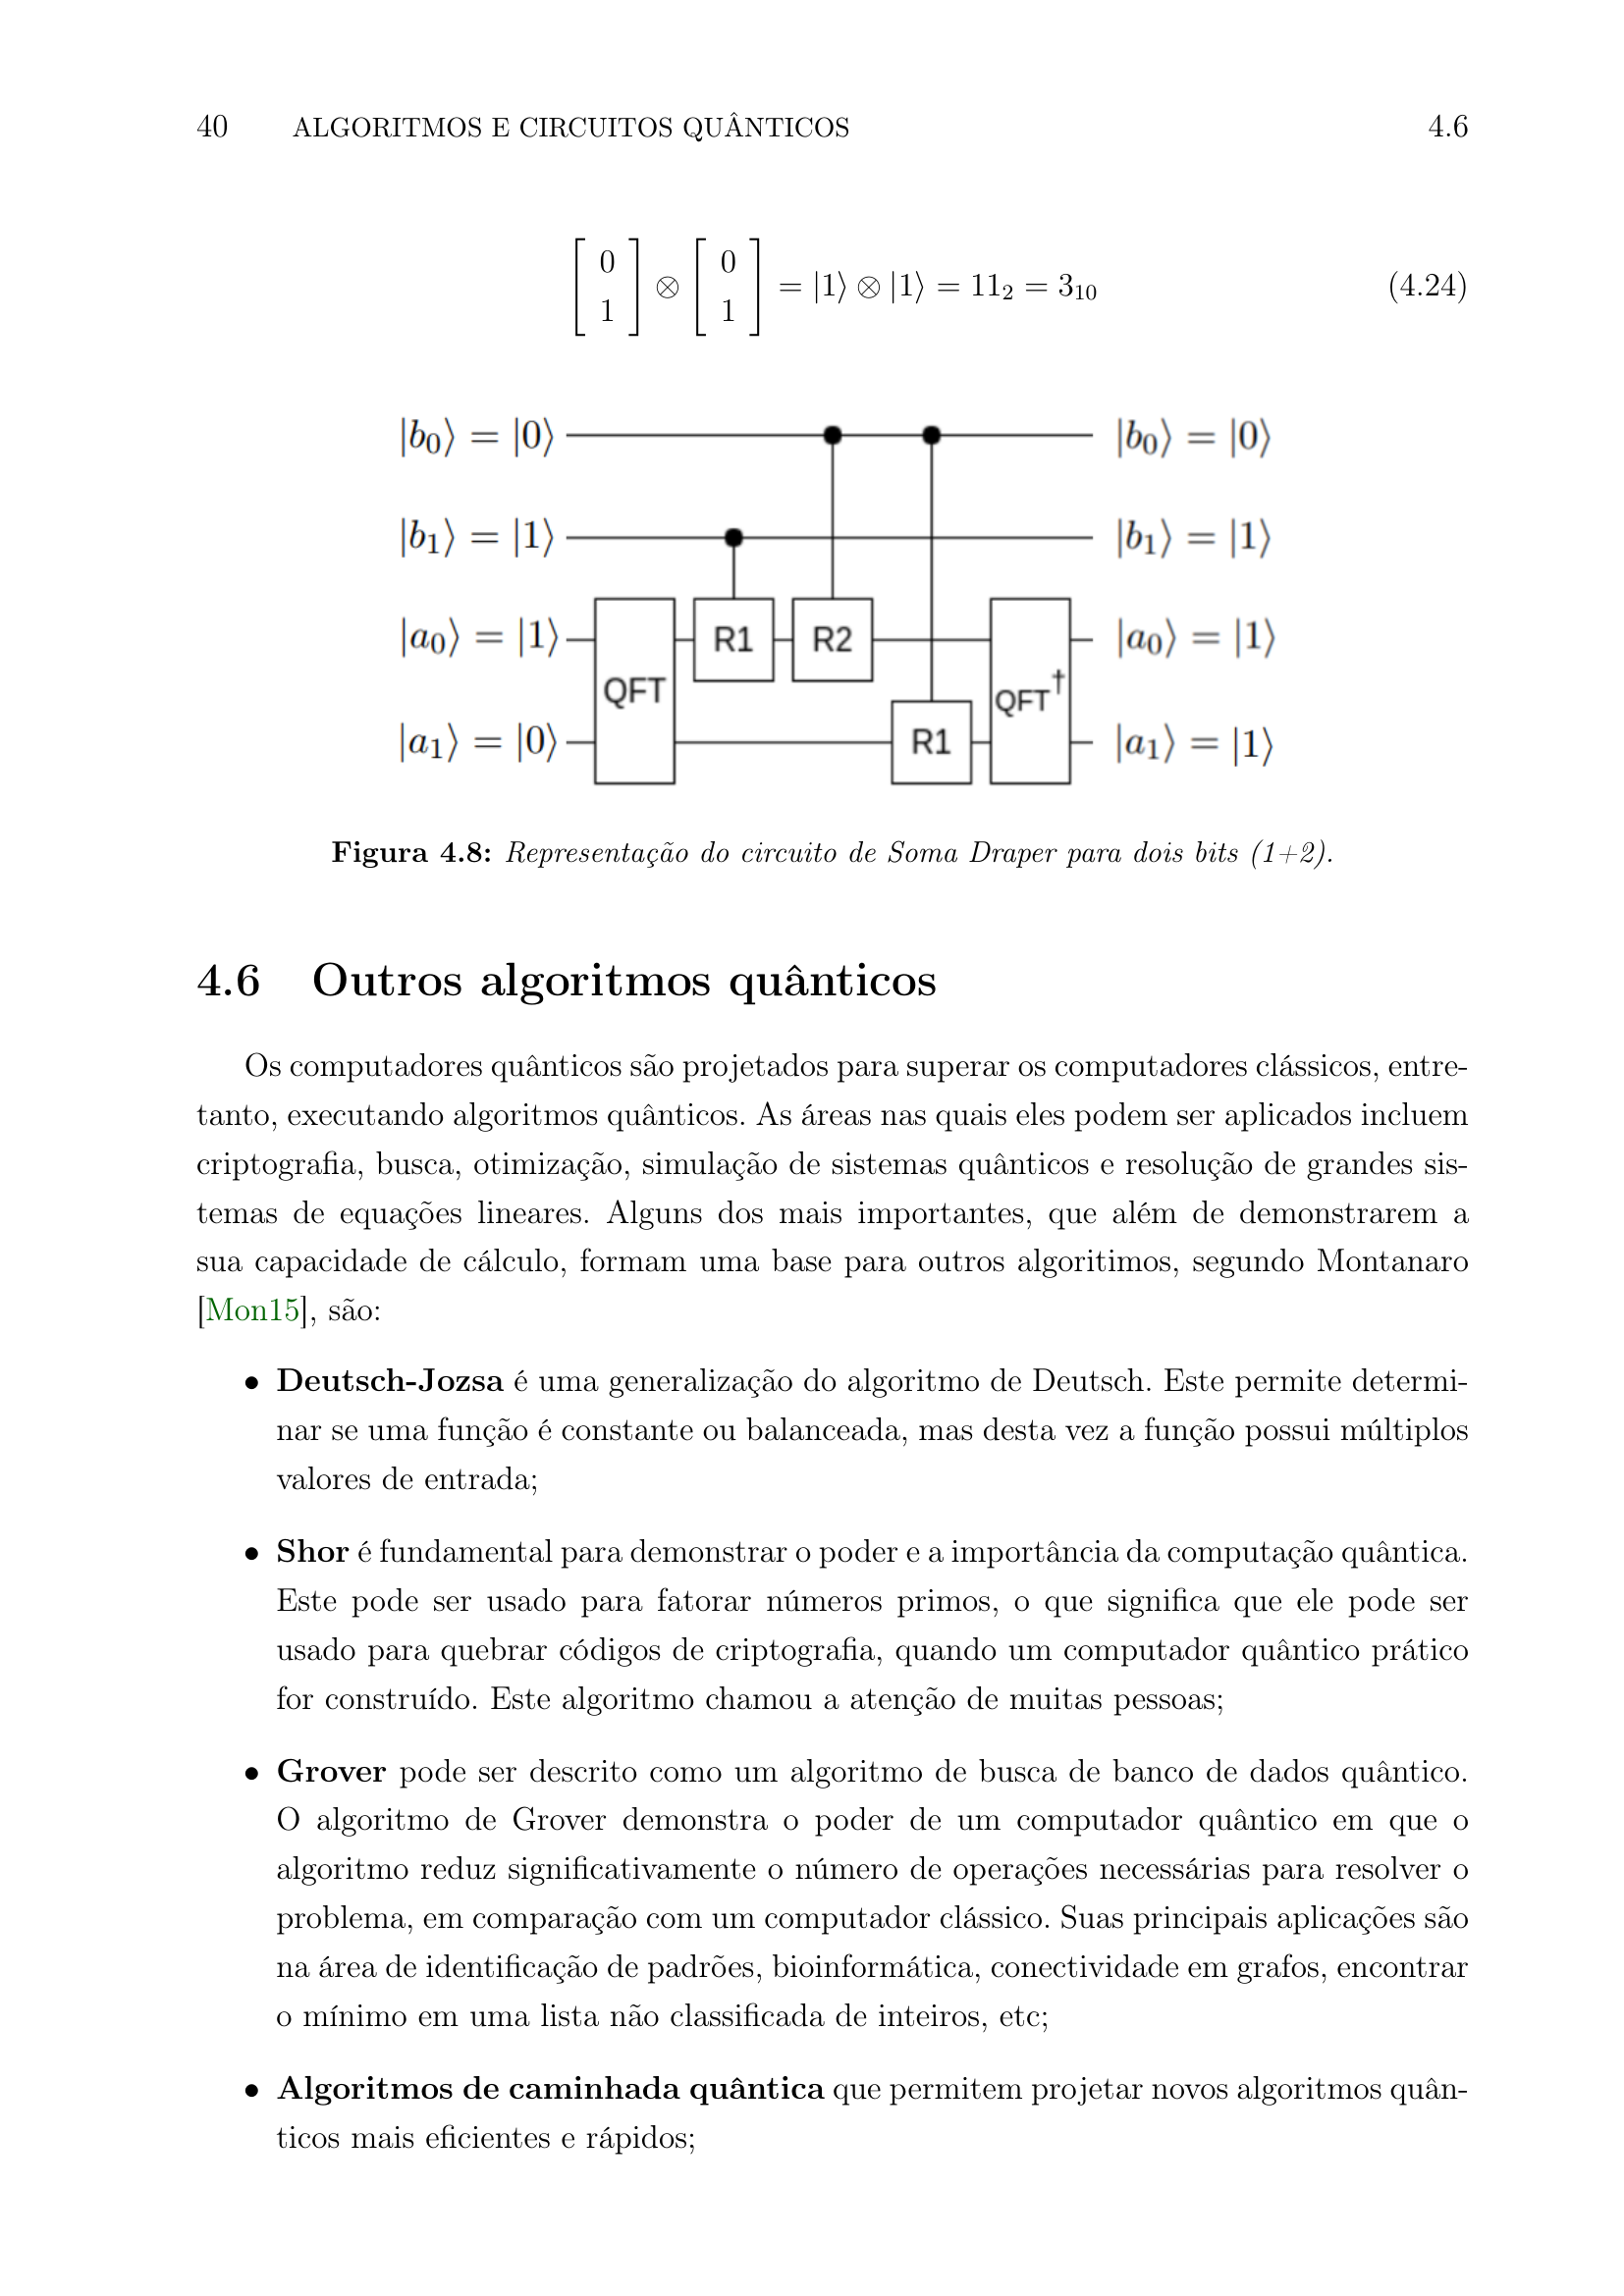

Com base na imagem que você forneceu, aqui estão as informações sobre os algoritmos de Shor e Grover:

*   **Algoritmo de Shor:** Este algoritmo é fundamental para demonstrar o poder e a importância da computação quântica. Ele é usado para resolver problemas, como a fatoração de números primos.

*   **Algoritmo de Grover:** Este algoritmo é usado para resolver problemas, como a identificação de padrões, otimização, resolução de problemas e a criação de listas, em sua maioria, em grafos.


In [ ]:
inference_result = inference("O que o algoritmo de Shor revolve e o que faz o algoritmo de Groove?")
print(inference_result)

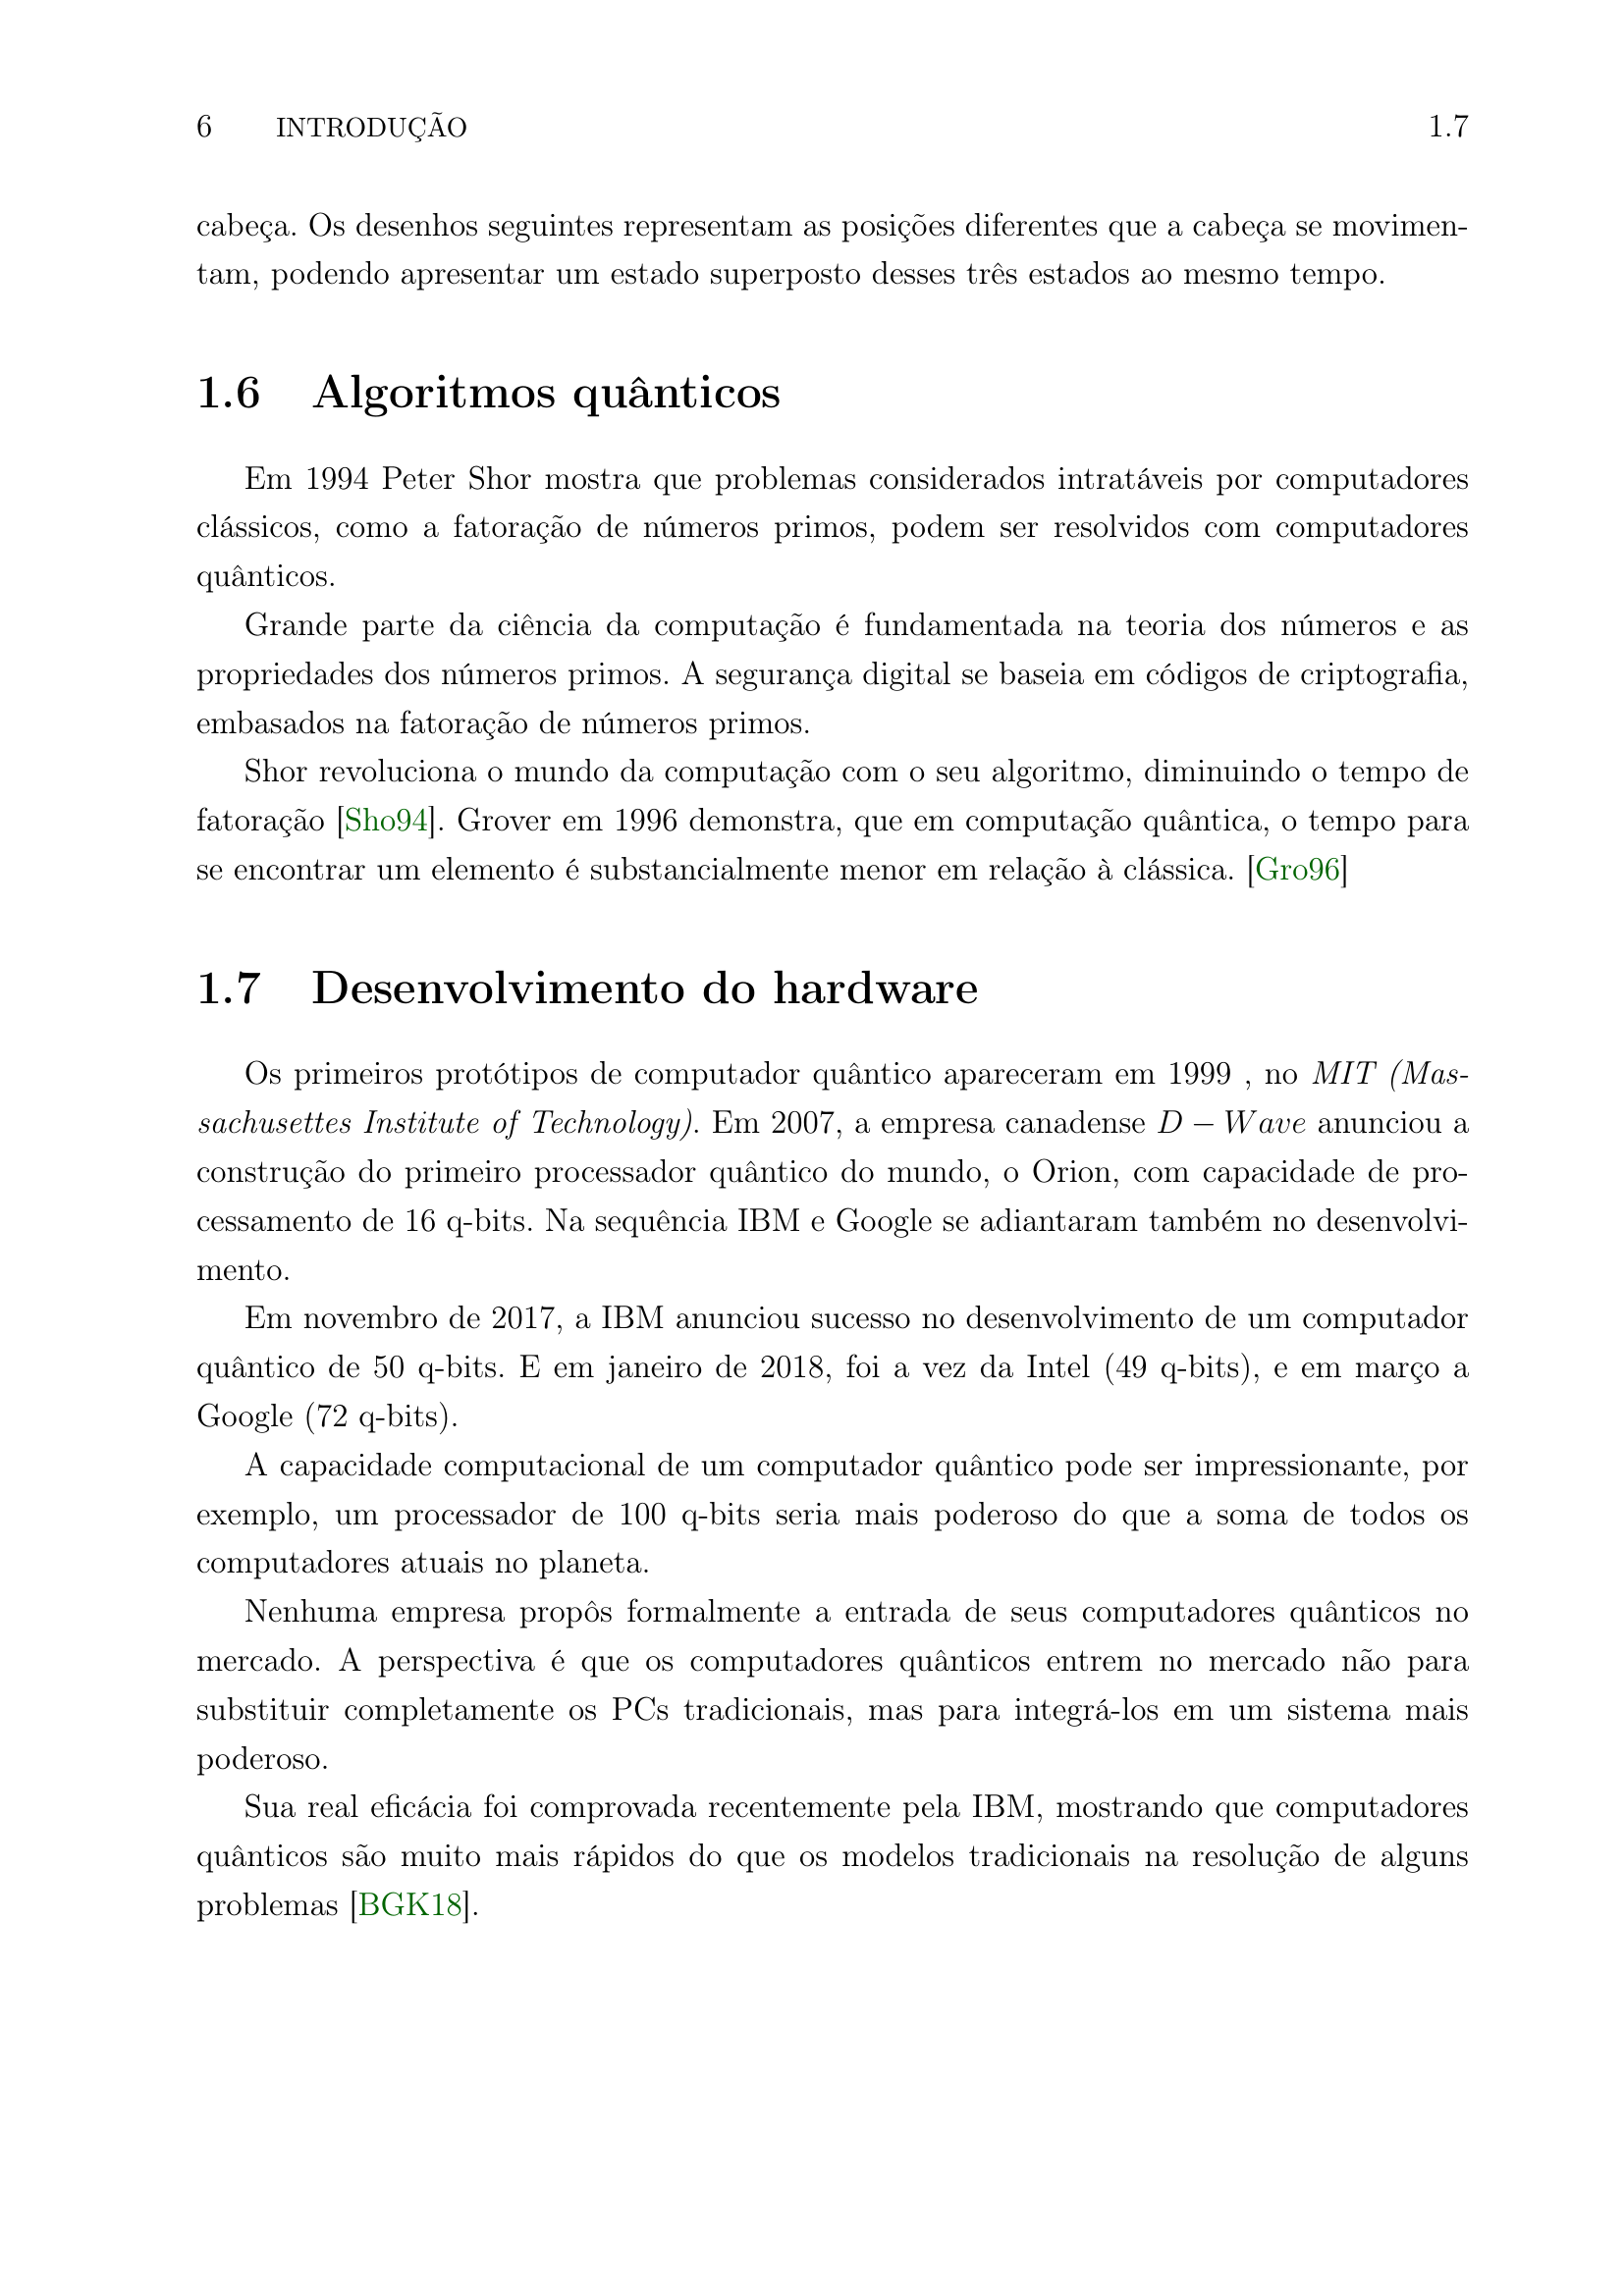

De acordo com o texto, as empresas que estão envolvidas no desenvolvimento de computadores e softwares quânticos são:

*   **IBM**
*   **Google**
*   **Intel**


In [ ]:
inference_result = inference("Quais as empresas estão fabricando computadores e softwares quanticos?")
print(inference_result)

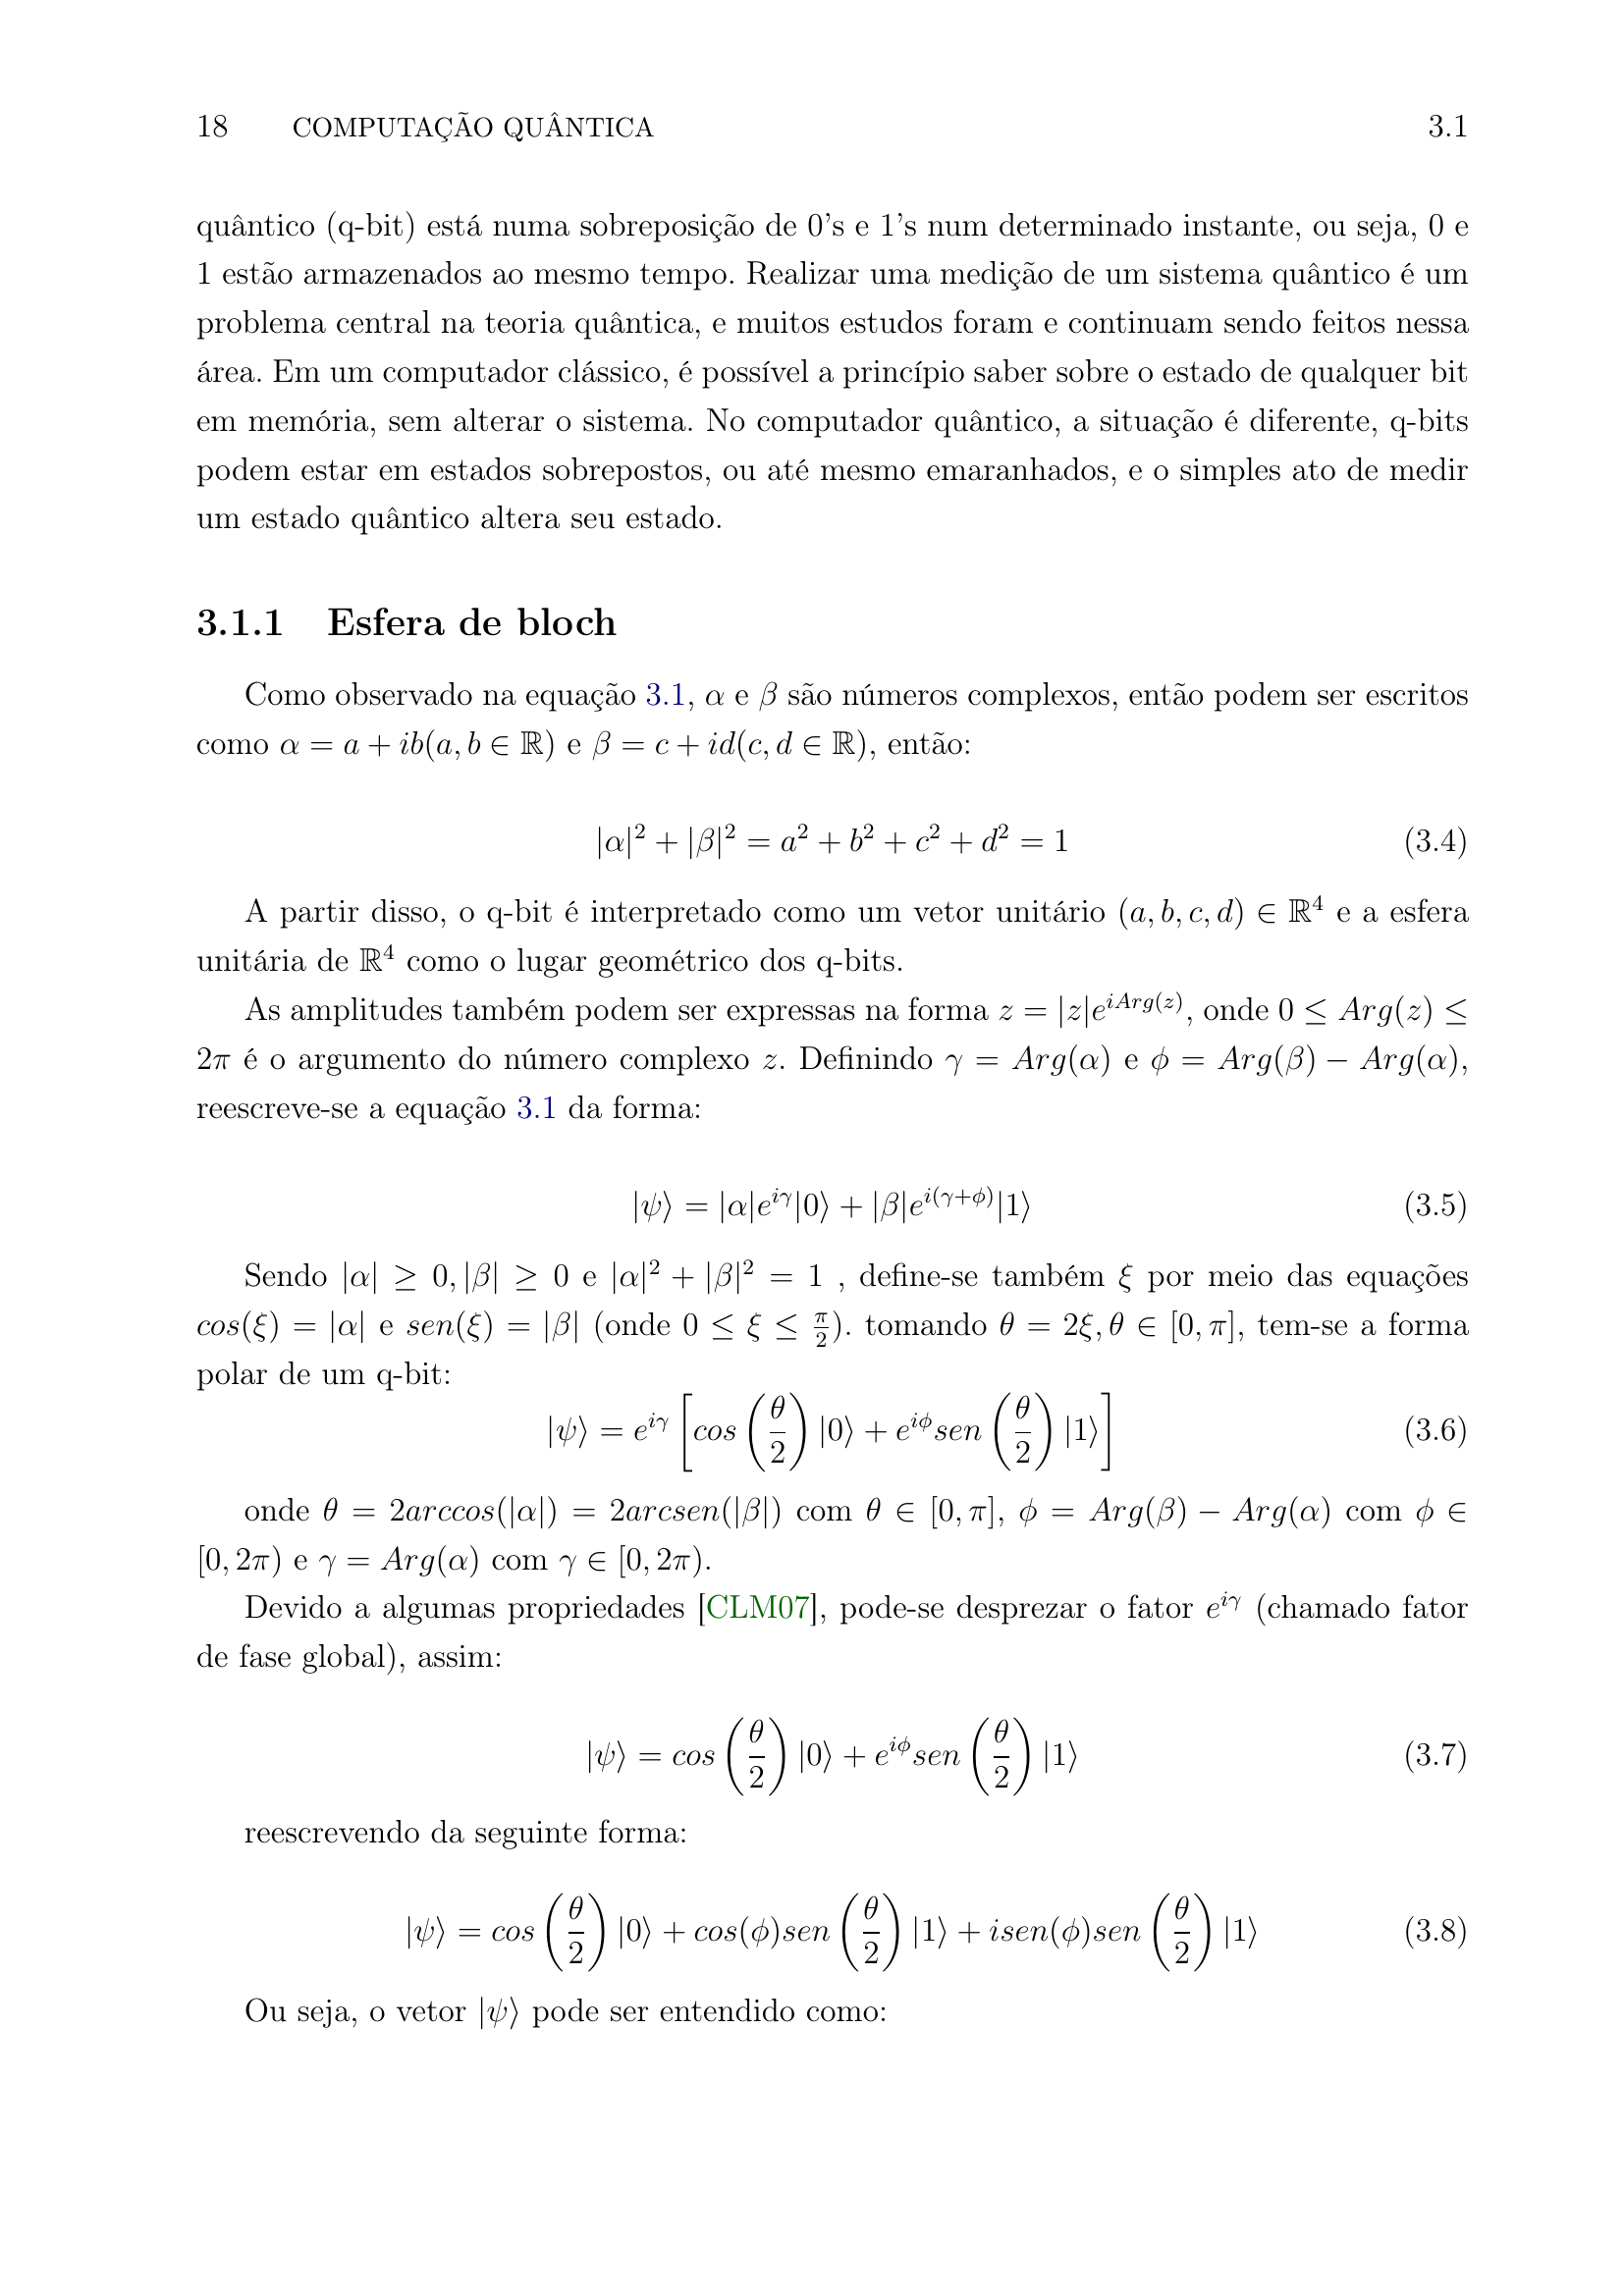

A explicação que você forneceu descreve de forma clara e concisa o conceito de qbits e sua relação com a esfera de Bloch. Vamos destrinchar os pontos principais:

**Qbits (Bits Quânticos):**

*   **Estado sobreposto:** Um qbit é diferente de um bit clássico, que só pode estar em um estado definido (0 ou 1). Um qbit, devido à sua natureza quântica, pode estar em uma combinação de ambos os estados simultaneamente – essa é a sobreposição.
*   **Representação:** Um qbit é representado por um vetor unitário no espaço euclidiano de 4 dimensões (ℝ⁴). Este vetor é definido por suas componentes: a, b, c e d.
*   **Unidade:** O módulo (magnitude) do vetor é sempre 1, garantindo que a probabilidade total de se obter 0 ou 1 seja de 1.

**Esfera de Bloch:**

*   **Representação geométrica:** A esfera de Bloch é a representação geométrica do estado de um qbit.  É uma esfera de raio 1 no espaço euclidiano.
*   **Coordenadas:** Cada ponto na esfera de Bloch corresponde a um estado possível do qbit.
* 

In [ ]:
inference_result = inference("O que são Qbits e qual sua relação com a esfera de Bloch?")
print(inference_result)

In [ ]:
# https://huggingface.co/nanonets/Nanonets-OCR-s

In [ ]:
# https://reports.weforum.org/docs/WEF_Global_Risks_Report_2025.pdf